# Inspection of Esmeralda Files


### Nov 2020, JAH

In [31]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [32]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
plt.style.context('seaborn-colorblind')

to_df = pd.DataFrame.from_records

In [33]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

In [34]:
import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed Nov 11 11:46:01 2020


In [35]:
datadir    = f"/data_extra2/jrenner/analysis/NEW"
run_number = str(8180)
filename   = datadir + f'/{run_number}' + f'/hdf5/cdst/trigger2/cdst_combined_{run_number}' + '.h5'
print('data filename: ', filename)

data filename:  /data_extra2/jrenner/analysis/NEW/8180/hdf5/cdst/trigger2/cdst_combined_8180.h5


In [36]:
f = tb.open_file(filename, 'r')
print(f)

/data_extra2/jrenner/analysis/NEW/8180/hdf5/cdst/trigger2/cdst_combined_8180.h5 (File) ''
Last modif.: 'Thu Nov  5 01:57:32 2020'
Object Tree: 
/ (RootGroup) ''
/DST (Group) ''
/DST/Events (Table(563388,), shuffle, zlib(4)) 'KDST Events'
/Summary (Group) ''
/Summary/Events (Table(443499,), shuffle, zlib(4)) 'Event summary information'
/Tracking (Group) ''
/Tracking/Tracks (Table(539115,), shuffle, zlib(4)) 'Track information'



## All DF

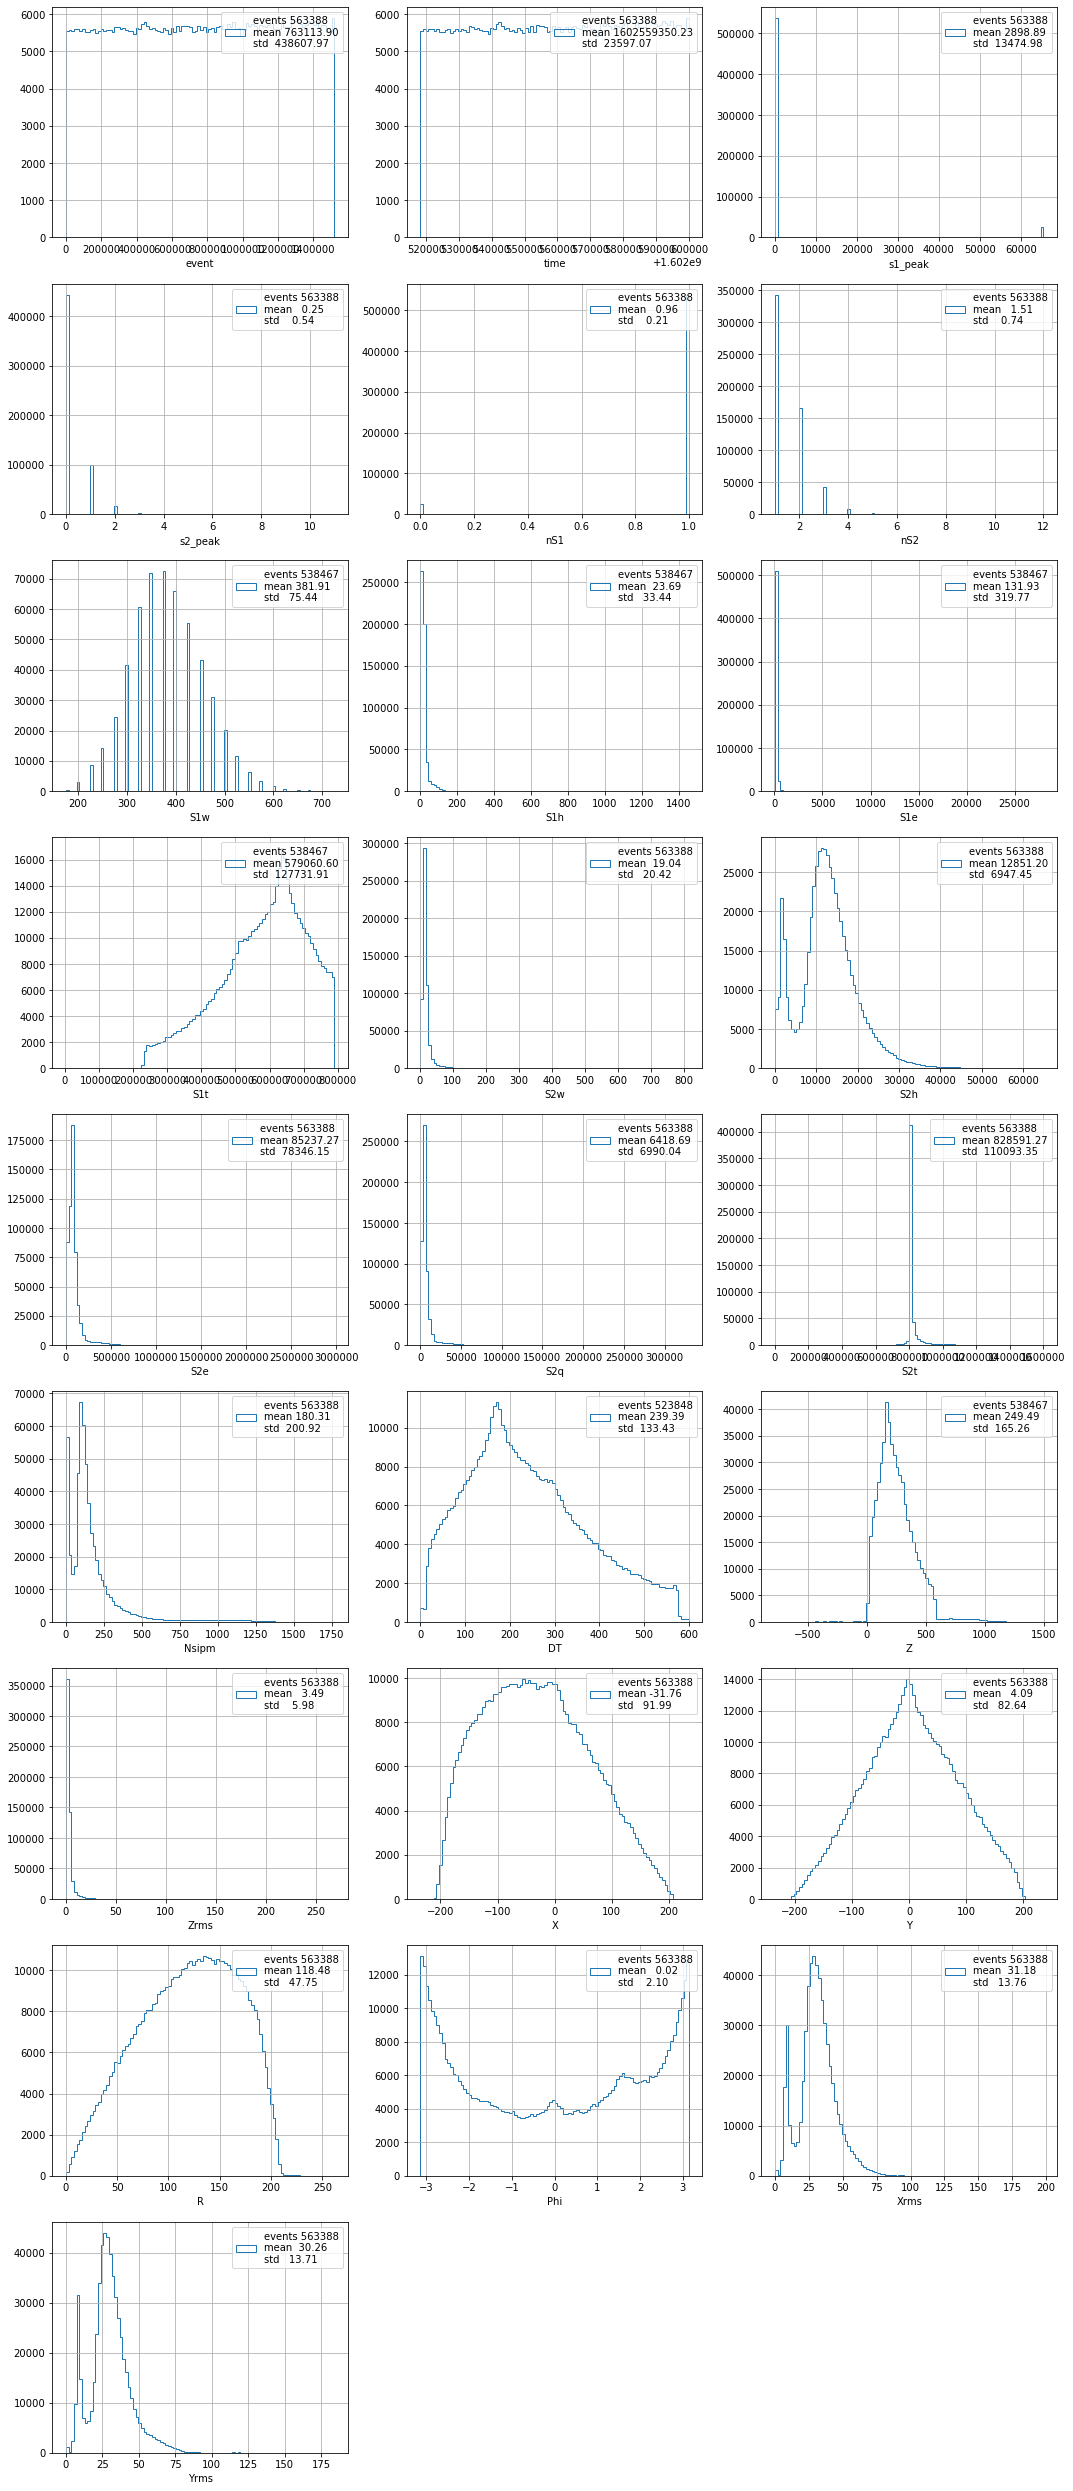

In [38]:
ranges = {}
ranges['DT'] = (0., 600.)
dfe = to_df(f.root.DST.Events.read())
pltext.plt_inspect_df(dfe, ranges = ranges, ncolumns = 3)

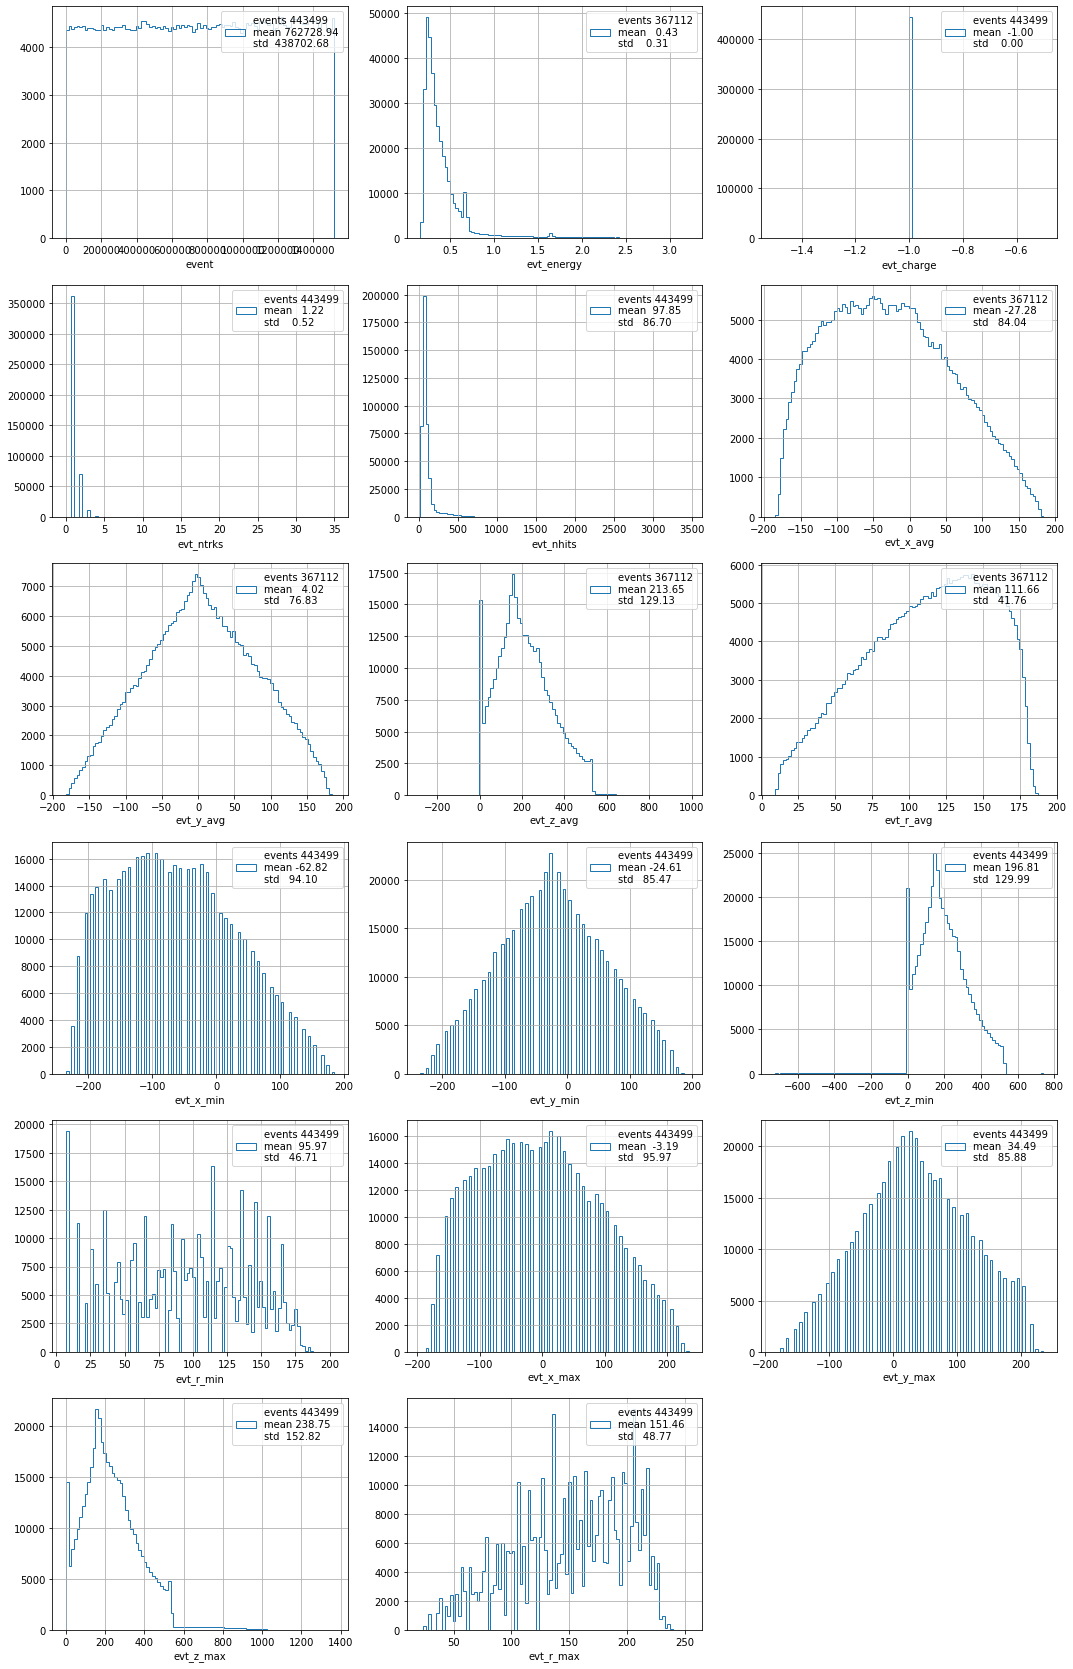

In [39]:
dfs = to_df(f.root.Summary.Events.read())
pltext.plt_inspect_df(dfs, labels = dfs.columns[:-1], ncolumns = 3)

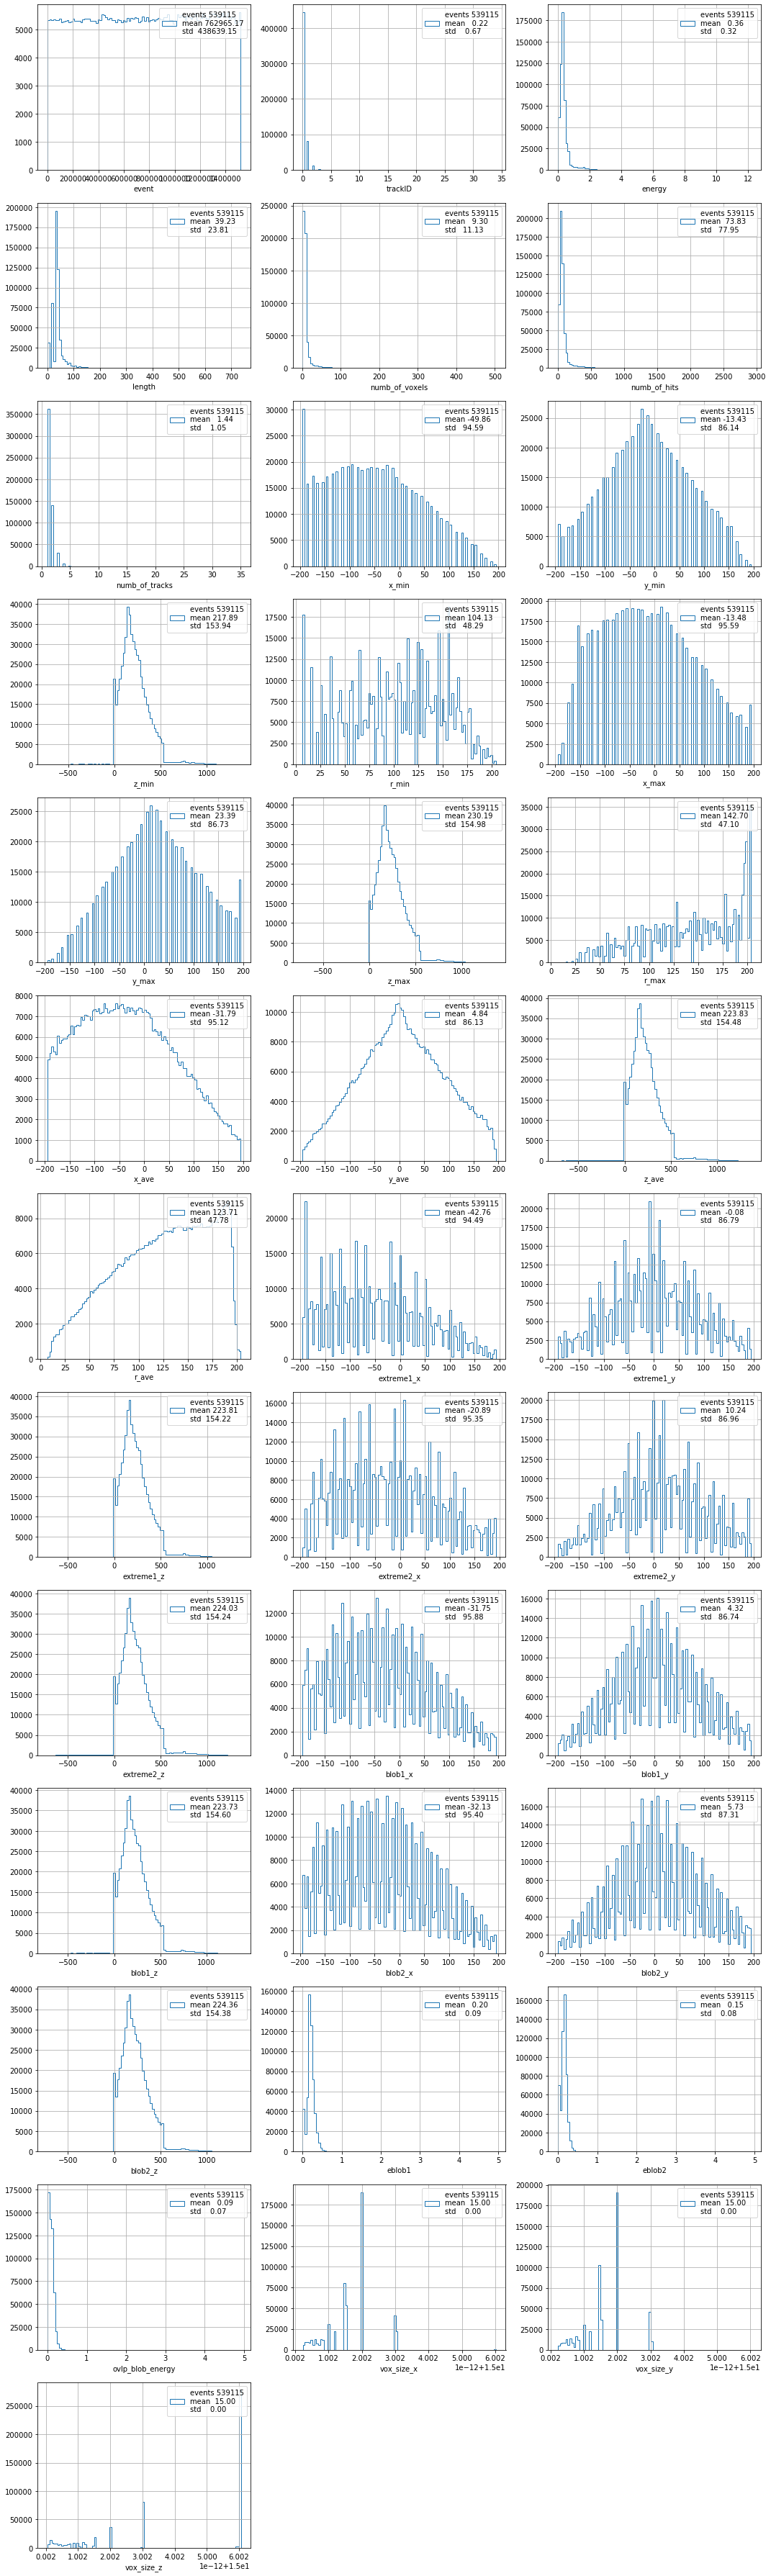

In [40]:
dft = to_df(f.root.Tracking.Tracks.read())
pltext.plt_inspect_df(dft, ncolumns = 3)

### quick look at the variables

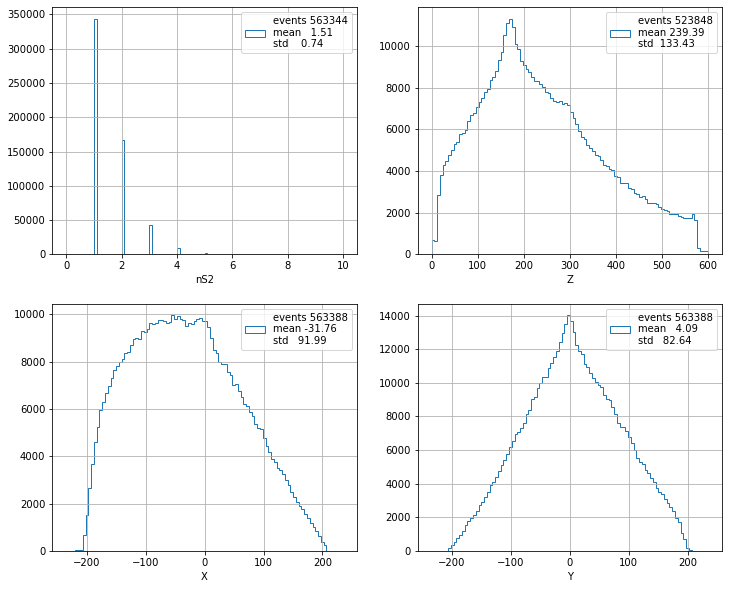

In [42]:
labels = ('nS2', 'Z', 'X', 'Y')
ranges = {'nS2' : (0, 10), 'Z' : (0., 600.)}
pltext.plt_inspect_df(dfe, labels = labels, ranges = ranges)

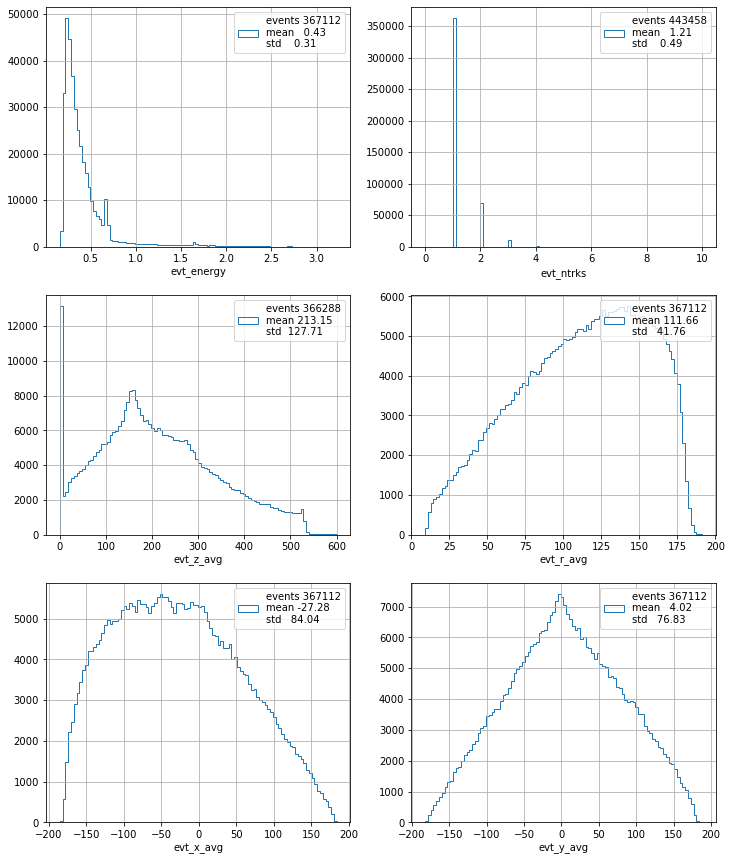

In [43]:
labels = ('evt_energy', 'evt_ntrks', 'evt_z_avg', 'evt_r_avg', 'evt_x_avg', 'evt_y_avg')
ranges = {'evt_ntrks' : (0, 10), 'evt_z_avg' : (0., 600.)}
pltext.plt_inspect_df(dfs, labels = labels, ranges = ranges)